# Russia Religious Landscape
## In comparison with Urkaine
##### For *Applied Plotting, Charting & Data Representation in Python* course by the University of Michigan
https://www.coursera.org/learn/python-plotting/home/welcome

**Region:** Russia

**Domain category:** Religious landscape

### **Research question** 
_Is that true that those who associate themselves with Islam in Russia are more than in Ukraine?_

# Get population data for two countries

In [1]:
import pandas as pd
import numpy as np

### 1. Russia
Data source: http://www.worldometers.info/world-population/russia-population/

In [2]:
russia_pop = pd.read_excel('Russia - population.xls',header=3,index_col=0)

### 2. Ukraine
Data source: http://www.worldometers.info/world-population/ukraine-population/

In [3]:
ukraine_pop = pd.read_excel('Ukraine - population.xls',header=3,index_col=0)

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<IPython.core.display.Javascript object>


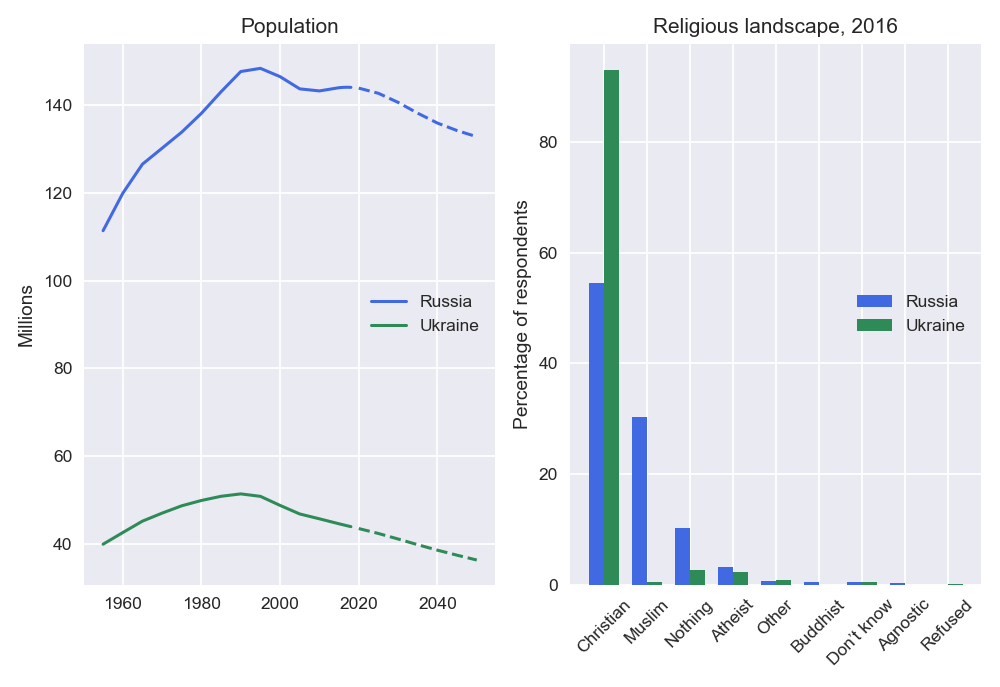

In [5]:
fig, ax = plt.subplots(1,2)
#plt.subplot(1,2,1)

ax[0].plot(russia_pop.index[:16],  russia_pop['Population'][:16]/1000000,color='royalblue',label='Russia')
ax[0].plot(ukraine_pop.index[:16],ukraine_pop['Population'][:16]/1000000,color='seagreen',label='Ukraine')
# Extimated population in upcoming years -- dashed line
ax[0].plot(russia_pop.index[16:],  russia_pop['Population'][16:]/1000000,color='royalblue',linestyle='dashed',label='')
ax[0].plot(ukraine_pop.index[16:],ukraine_pop['Population'][16:]/1000000,color='seagreen',linestyle='dashed',label='')

ax[0].set_title('Population')
ax[0].set_ylabel('Millions')
ax[0].legend()

# Get info on Religion & Public Life
### from the Pew Research Center
Data source: http://www.pewforum.org/dataset/eastern-european-survey-dataset/

Original SPSS (*.sav) file was converted into *.csv file with RStudio.

In [6]:
df = pd.read_csv('Eastern_Europe_Public_Data.csv',index_col=0)

In [7]:
russia = df[df['COUNTRY']==18]
ukraine = df[df['COUNTRY']==20]

In [8]:
# Values meaning to decode
map_dict = {1.0:'Christian',2.0:'Muslim',3.0:'Jewish',4.0:'Buddhist',9.0:'Atheist',10.0:'Agnostic',\
            21.0:'Old Believer/Old Ritualist',91.0:'Other',92.0: 'Nothing',\
            98.0:'Don’t know',99.0:'Refused'}

In [9]:
rel = pd.DataFrame([russia['qcurrelrusrec'].map(map_dict).value_counts(), \
                    ukraine['qcurrelukrrec'].map(map_dict).value_counts()]).T
rel.rename(columns={'qcurrelrusrec':'Russia','qcurrelukrrec':'Ukraine'},inplace=True)

In [10]:
# Calculate percentage
rel["Rus_percent"] = rel["Russia"] / rel["Russia"].sum() * 100
rel["Ukr_percent"] = rel["Ukraine"] / rel["Ukraine"].sum() * 100

In [11]:
bar_width = 0.35
opacity = 1
index = np.arange(len(rel))

rects1 = ax[1].bar(index, rel["Rus_percent"], bar_width,
                alpha=opacity, color='royalblue',
                label='Russia')

rects1 = ax[1].bar(index+bar_width, rel["Ukr_percent"], bar_width,
                alpha=opacity, color='seagreen',
                label='Ukraine')

ax[1].set_title('Religious landscape, 2016')
ax[1].legend(loc='center right')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(rel.index,rotation=45)
ax[1].set_ylabel('Percentage of respondents')
fig.tight_layout()

Full report by the Pew Research Center: http://www.pewforum.org/wp-content/uploads/sites/7/2017/05/CEUP-FULL-REPORT.pdf

In [12]:
rus_pop2016 = russia_pop.loc[2016,'Population']
ukr_pop2016 = russia_pop.loc[2016,'Population']

# Conslusion

### How many citizens in Russia called themselves Muslim?

In [13]:
print("There were {0:.1f}".format(rus_pop2016 * rel.loc['Muslim','Rus_percent'] /100000000), \
      'mln or ' "{0:.1%} of total population".format(rel.loc['Muslim','Rus_percent']/100), \
      "calling themselves Muslim in Russia in 2016.")

There were 43.5 mln or 30.2% of total population calling themselves Muslim in Russia in 2016.


### How many citizens in Ukraine called themselves Muslim?

In [14]:
print("There were {0:.1f}".format(ukr_pop2016 * rel.loc['Muslim','Ukr_percent'] /100000000), \
      'mln or ' "{0:.1%} of total population".format(rel.loc['Muslim','Ukr_percent']/100), \
      "calling themselves Muslim in Ukraine in 2016.")

There were 0.8 mln or 0.6% of total population calling themselves Muslim in Ukraine in 2016.
